In [30]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [31]:
stock_data = pd.read_csv('Dow Jones_MonthlyAvarage.csv')
pandemic_data = pd.read_csv('pandemic monthly.csv')

In [32]:
stock_data['date'] = pd.to_datetime(stock_data['date'])
pandemic_data['date'] = pd.to_datetime(pandemic_data['date'])

In [33]:
data = pd.merge(stock_data, pandemic_data, on='date')

data = data.rename(columns={'date': 'ds', 'price': 'y', 'cases': 'cases'})

data['lag_1'] = data['y'].shift(1)
data['lag_2'] = data['y'].shift(2)
data.dropna(inplace=True)

In [34]:
train_data = data[data['ds'] < '2021-05-01'] 
test_data = data[(data['ds'] >= '2009-03-01') & (data['ds'] < '2024-06-01')]

In [35]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

model.add_regressor('cases')
model.add_regressor('lag_1')
model.add_regressor('lag_2')

model.fit(train_data)

23:05:08 - cmdstanpy - INFO - Chain [1] start processing
23:05:08 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = test_data[['ds', 'cases', 'lag_1', 'lag_2']]

forecast = model.predict(future)

In [37]:
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)

accuracy = (1 - (mae / test_data['y'].mean())) * 100

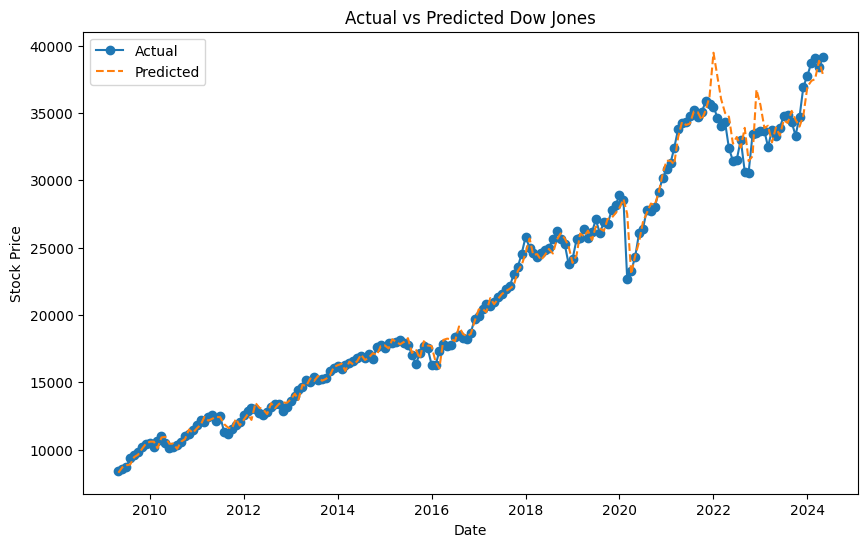

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(test_data['ds'], test_data['y'], label='Actual', marker='o')

ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', linestyle='--')

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Actual vs Predicted Dow Jones')
ax.legend()

plt.show()

In [39]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'Accuracy: {accuracy:.2f}%')

MAE: 568.7786101768738
MSE: 792710.5840667038
RMSE: 890.3429586775558
Accuracy: 97.37%
